Loading model...


/var/folders/wg/d1y3qvk103gdr7sntsqgtyb40000gn/T/ipykernel_3520/3006664957.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period="180d", interval="1d")
[*********************100%***********************]  1 of 1 completed


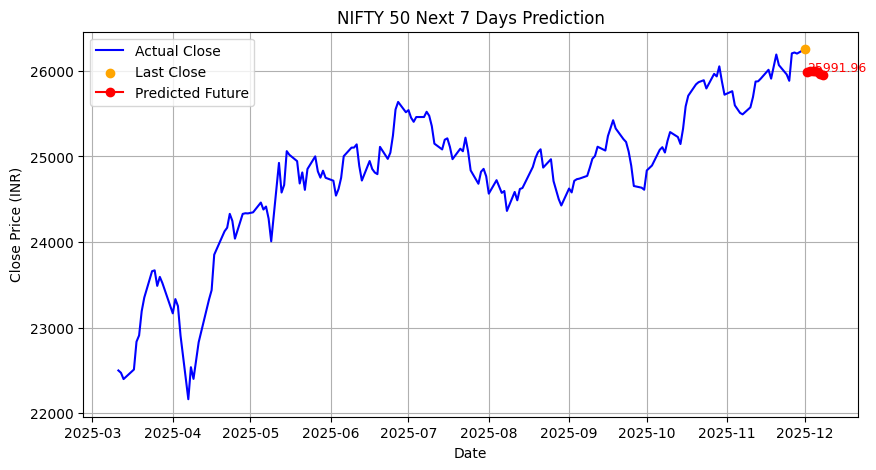


Future Predictions (with Dates):
2025-12-02 → 25991.96 INR
2025-12-03 → 26002.86 INR
2025-12-04 → 26002.13 INR
2025-12-05 → 25994.66 INR
2025-12-06 → 25982.77 INR
2025-12-07 → 25968.26 INR
2025-12-08 → 25952.28 INR


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

MODEL_PATH = "models/nifty_lstm_model.h5"
TICKER = "^NSEI"
SEQ_LEN = 60
PRED_DAYS = 7   # 🔹 Number of future days to predict

print("Loading model...")
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
scaler = MinMaxScaler(feature_range=(0, 1))

df = yf.download(TICKER, period="180d", interval="1d")
close_prices = df["Close"].values.reshape(-1, 1)
scaled = scaler.fit_transform(close_prices)

future_preds = []
last_seq = scaled[-SEQ_LEN:].copy()

for _ in range(PRED_DAYS):
    X_test = np.expand_dims(last_seq, axis=0)
    pred = model.predict(X_test, verbose=0)
    future_pred = pred[0][0]
    future_preds.append(future_pred)
    last_seq = np.append(last_seq, [[future_pred]], axis=0)
    last_seq = last_seq[-SEQ_LEN:]

future_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))


future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=PRED_DAYS)
plt.figure(figsize=(10, 5))
plt.plot(df.index, close_prices, label="Actual Close", color="blue")
plt.scatter(df.index[-1], close_prices[-1], color="orange", label="Last Close", zorder=5)
plt.plot(future_dates, future_prices, color="red", marker="o", label="Predicted Future")


plt.text(future_dates[0], future_prices[0],
         f"{future_prices[0][0]:.2f}", color="red", fontsize=9, ha="left")

plt.title(f"NIFTY 50 Next {PRED_DAYS} Days Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

print("\nFuture Predictions (with Dates):")
for date, price in zip(future_dates, future_prices.flatten()):
    print(f"{date.strftime('%Y-%m-%d')} → {price:.2f} INR")

